In [1]:
%cd ../..

c:\Users\abdul\Desktop\TUM\thesis\thesis


In [2]:
dll_dir = r"C:\Users\abdul\Desktop\TUM\thesis\openslide-win64-20221111\bin"

import os
with os.add_dll_directory(dll_dir):
    from openslide import OpenSlide
from matplotlib import pyplot as plt, patches

- OpenSlide is used for reading whole slide images and creating patches.

In [3]:
# read in sample image and display some info

image = OpenSlide("sample_image.tif")
print("image level count:", image.level_count)
print("image level dimensions:", image.level_dimensions)
print("image level downsamples:", image.level_downsamples)

x_res = 1e4 / float(image.properties['tiff.XResolution'])
y_res = 1e4 / float(image.properties['tiff.YResolution'])
print(f"image resolution (in microns): {x_res:.2f} x {y_res:.2f}")

image level count: 8
image level dimensions: ((67456, 37376), (33728, 18688), (16864, 9344), (8432, 4672), (4216, 2336), (2108, 1168), (1054, 584), (527, 292))
image level downsamples: (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0)
image resolution (in microns): 0.46 x 0.46


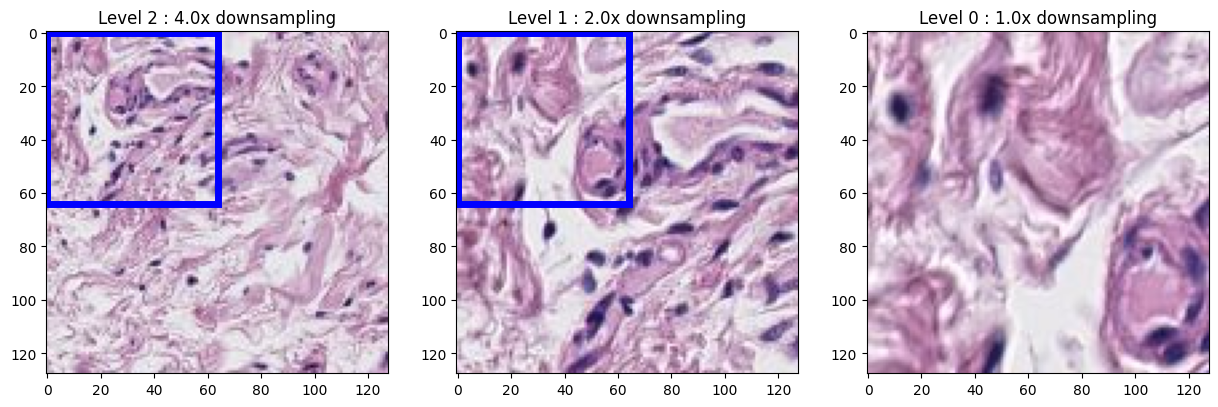

In [4]:
# display regions in the WSI with varying magnification

location = (4000, 20000)  # top left pixel coordinates in the level 0 reference frame
size = (128, 128)  # region size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for idx, ax in enumerate(axes):
    level = 2 - idx # level number, 0 is highest magnification
    ax.imshow(image.read_region(location, level, size))
    if level:
        ax.add_patch(patches.Rectangle((0, 0), 64, 64, linewidth=5, edgecolor='b', facecolor='none'))
    ax.set_title(f"Level {level} : {image.level_downsamples[level]}x downsampling")
plt.show()